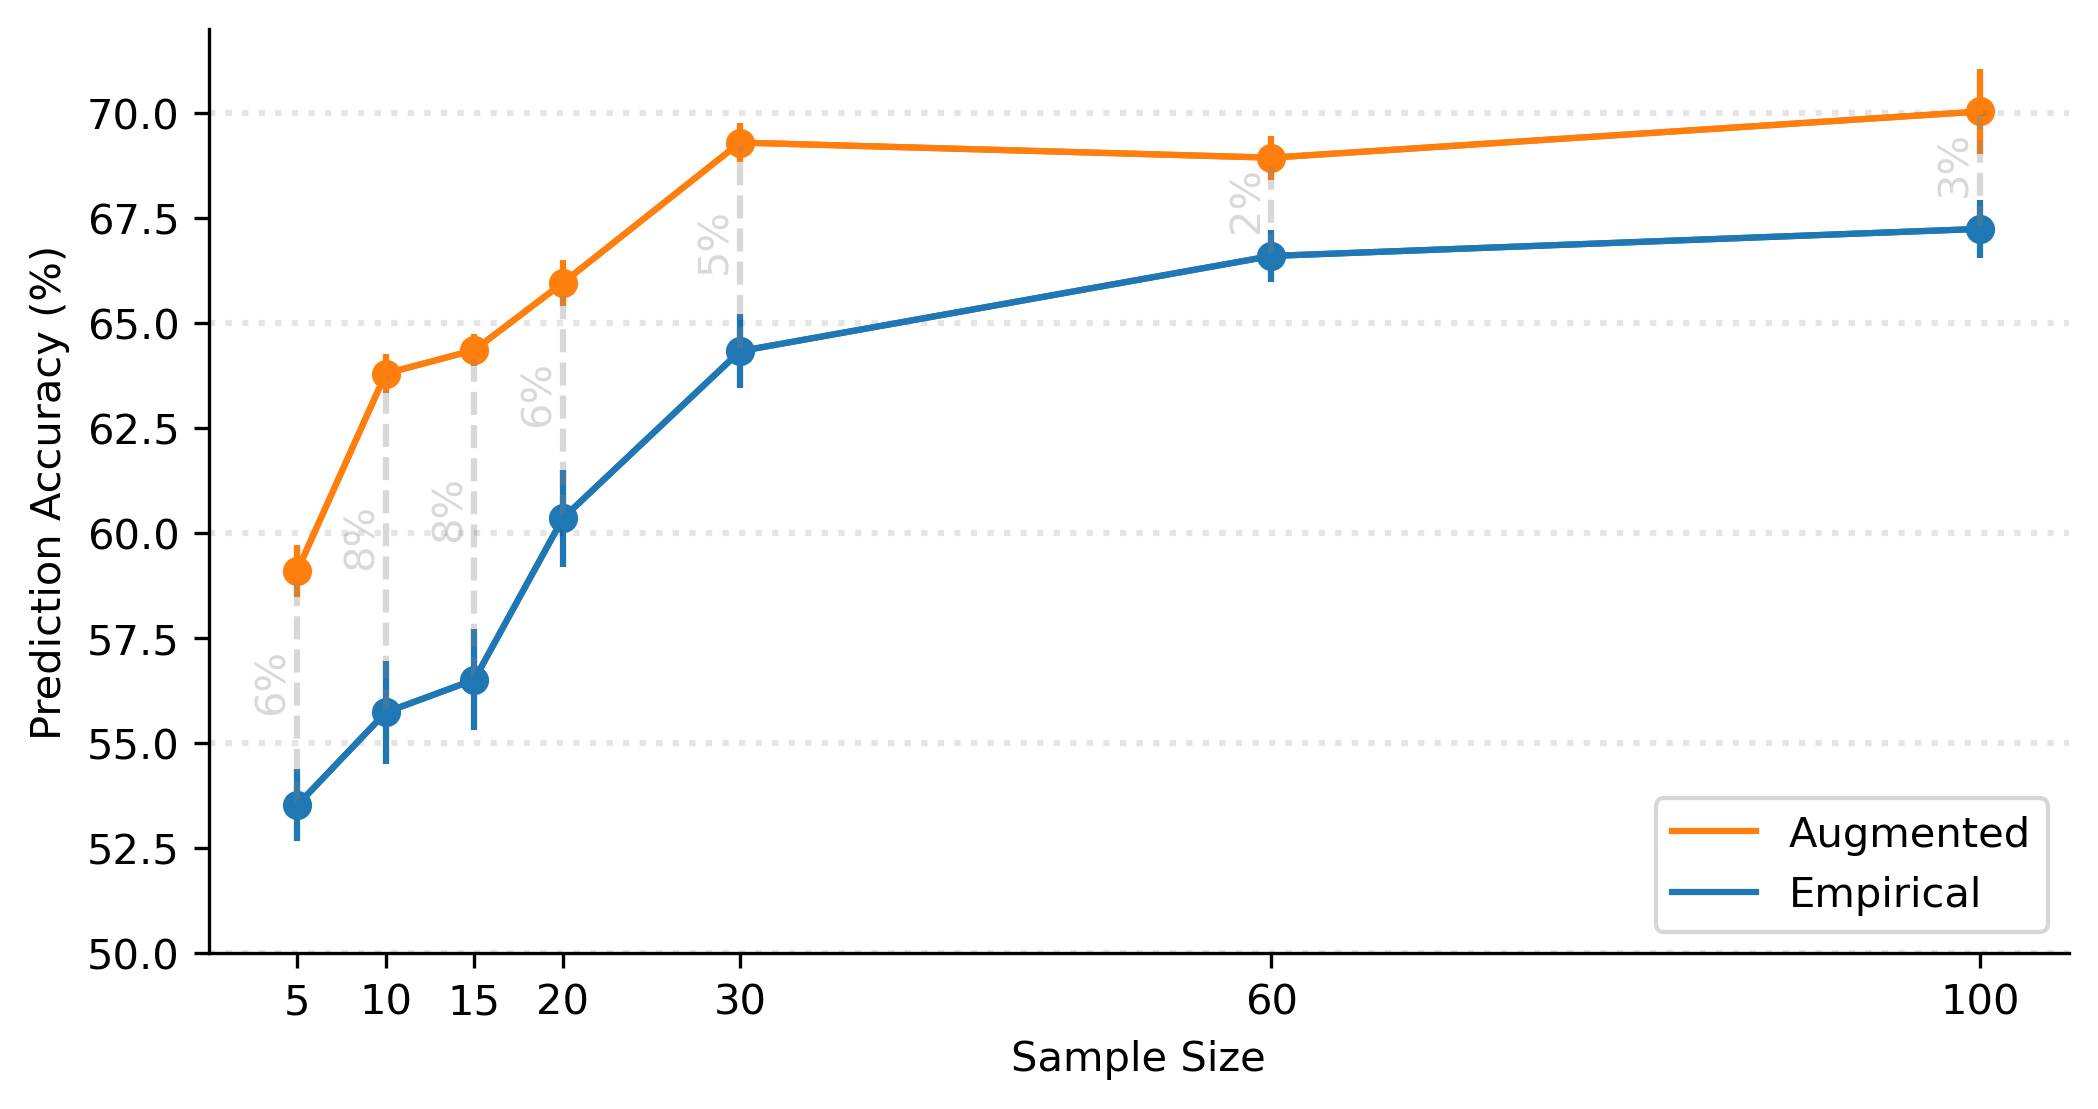

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
    
#xLabels = [5,10,15,20,30,40,50,60,80,100]
xLabels = [5,10,15,20,30,60,100]

def loadAndPlot(filename, plotColor, legendName):
    data = []
    with open(filename) as f:
        [data.append(line.split(',')[0:4]) for line in f.readlines()]
    data = np.asarray(data).astype(int)
    
    meanData = []
    semData = []
    for ss in np.unique(data[:,0]):
        ssIndex = data[:,0] == ss
        meanData.append(np.mean(data[ssIndex,3]))
        semData.append((np.std(data[ssIndex,3]))/np.sqrt(len(data[ssIndex,3]))) #SEM
        
    plt.plot(np.unique(data[:,0]),meanData, color = plotColor)
    plt.scatter(np.unique(data[:,0]),meanData,label='_nolegend_', color = plotColor)
    plt.errorbar(np.unique(data[:,0]),meanData,semData,label='_nolegend_', color = plotColor)
        
    return legendName

def plotDiffData():
    nnDataDS = []
    with open('empiricalPredictions_NN_Runs8000.csv') as f:
        [nnDataDS.append(line.split(',')[0:4]) for line in f.readlines()]
    nnDataDS = np.asarray(nnDataDS).astype(int)

    nnDataDSSyn_SynP100 = []
    with open('augmentedPredictions_NN_SynP050_Runs8000_Filtered.csv') as f:
        [nnDataDSSyn_SynP100.append(line.split(',')[0:4]) for line in f.readlines()]
    nnDataDSSyn_SynP100 = np.asarray(nnDataDSSyn_SynP100).astype(int)

    meanDataDS = []
    for ss in np.unique(nnDataDS[:,0]):
        ssIndex = nnDataDS[:,0] == ss
        meanDataDS.append(np.mean(nnDataDS[ssIndex,3]))

    meanDataDSSyn_SynP100 = []
    for ss in np.unique(nnDataDSSyn_SynP100[:,0]):
        ssIndex = nnDataDSSyn_SynP100[:,0] == ss
        meanDataDSSyn_SynP100.append(np.mean(nnDataDSSyn_SynP100[ssIndex,3]))

    #meanDiff = [np.nan]*len(meanDataDS)
    meanDiff = []
    for ss in range(len(meanDataDSSyn_SynP100)):
        meanDiff.append(meanDataDSSyn_SynP100[ss]-meanDataDS[ss])

    if plotDiffs:
        for i in range(len(meanDataDSSyn_SynP100)):
            plt.plot([xLabels[i],xLabels[i]], [meanDataDS[i],meanDataDSSyn_SynP100[i]], linestyle="--", color="grey", alpha=.3, label='_nolegend_')
            ax1.annotate(str(round(meanDiff[i]))+'%', (xLabels[i]-2.5, np.mean([meanDataDS[i],meanDataDSSyn_SynP100[i]])-.4),  ha='left', rotation=90, color='grey',alpha=.3)

def formatPlot():
    axisLevels = np.arange(40,75,5)
    for y in axisLevels:
        plt.axhline(y=y, color='k', linestyle=':', alpha=.1)
    plt.ylim(50,72)
    plt.xlim(0,105)
    plt.xticks(xLabels)
    plt.legend(legendNames, loc='lower right')
    plt.ylabel('Prediction Accuracy (%)')
    plt.xlabel('Sample Size')
    
##########################################################
## Setup Figure
##########################################################

plt.figure(figsize=(8, 4), dpi=300)

##########################################################
## Plot Neural Network
##########################################################
ax1 = plt.subplot(1,1,1)
legendNames = []
legendNames.append(loadAndPlot('augmentedPredictions_NN_SynP050_Runs8000_Filtered.csv','#ff7f0e','Augmented'))
legendNames.append(loadAndPlot('empiricalPredictions_NN_Runs8000.csv','#1f77b4','Empirical'))
plotDiffData()
formatPlot()
ax1.spines[['right', 'top']].set_visible(False)

##########################################################
## Save Plot
##########################################################
fig = plt.gcf()
fig.set_size_inches(8, 4)
fig.savefig('Figure N - Classification.png', dpi=600)
